In [1]:
from hashstash.profiler.serialize_profiler import *
df=run_comparisons(1000)
df.serializer_name.value_counts()

[0.00s] hashstash.utils.utils.cached_result(<function run_comparisons at 0x130f411c0>) >>>
[0.00s] >>> <function run_comparisons at 0x130f41580>


serializer_name
serialize         1000
jsonpickle        1000
jsonpickle_ext    1000
pickle            1000
orjson             611
json               478
Name: count, dtype: int64

In [2]:
pd.options.display.max_rows=None

def summarize_by_group(df, group_by=['data_type','serializer_name'], sort_by=['deserialize_speed']):
    df = df.copy()
    df['data_type'] = df['data_type'].apply(lambda x: 'builtins' if x.split('.')[0]=='builtins' else x)
    dfgrp = df.groupby(group_by).sum(numeric_only=True)
    dfgrp['serialize_speed'] = dfgrp['input_size_mb'] / dfgrp['serialize_time']
    dfgrp['deserialize_speed'] = dfgrp['input_size_mb'] / dfgrp['deserialize_time']
    return dfgrp.sort_values(sort_by, ascending=False)
    
odf=summarize_by_group(df, sort_by=['data_type','serialize_speed'])

In [3]:
summarize_by_group(df, group_by=['data_type'], sort_by='serialize_speed')

,serialize_speed,deserialize_speed,serialize_time,deserialize_time,size_mb,input_size_mb
data_type,,,,,,
numpy.ndarray,111.511998,187.006420,6.681318,3.984072,819.585441,745.047126
pandas.core.series.Series,29.420946,11.811866,1.560146,3.886005,42.936218,45.900967
builtins,20.972942,18.709847,1.750222,1.961925,34.745198,36.707314
pandas.core.frame.DataFrame,16.279718,8.880919,7.348908,13.471371,106.125216,119.638153
prosodic.texts.texts.Text,1.837705,1.433539,17.684124,22.669916,164.315186,32.498211


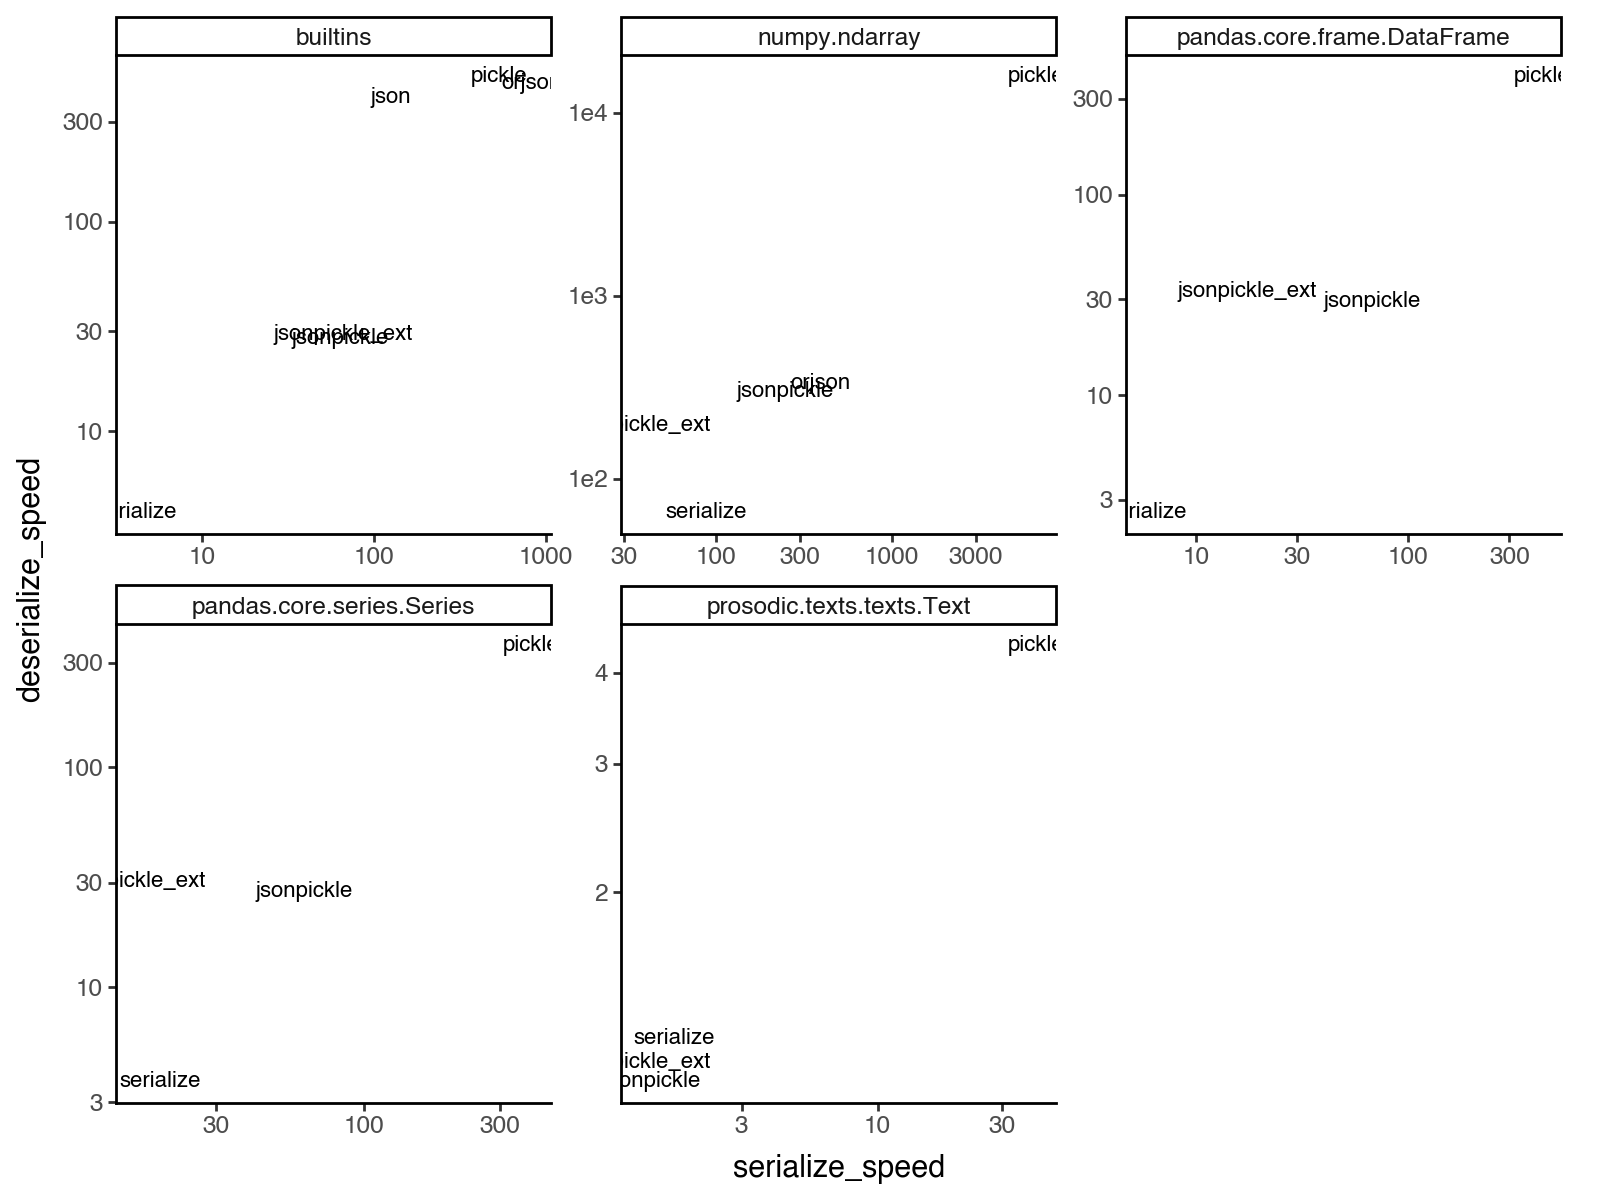

In [4]:
import plotnine as p9
p9.options.figure_size=(8,6)
fig = p9.ggplot(odf.reset_index(), p9.aes(x='serialize_speed', y='deserialize_speed',label='serializer_name'))
# fig+= p9.geom_point()
fig+=p9.geom_text(size=8)
fig+=p9.scale_x_log10()
fig+=p9.scale_y_log10()
fig+=p9.facet_wrap('data_type',nrow=2,scales='free')
fig+=p9.theme_classic()
fig += p9.theme(legend_position='bottom')
fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
fig